# 라이브러리 불러오기

In [113]:
import os
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

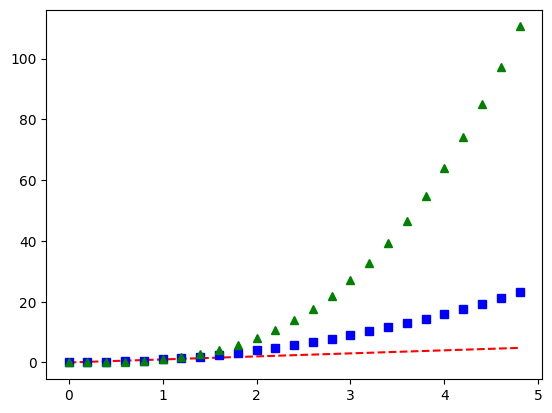

In [114]:
# 테스트용
# 200ms 간격으로 균일하게 샘플된 시간
t = np.arange(0., 5., 0.2)

# 빨간 대쉬, 파란 사각형, 녹색 삼각형
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

In [115]:
# 특정 경로에 있는 csv 파일만 불러오기
path = "./search/"

In [116]:
# listdir -> 현재 경로에 있는 모든 파일을 확인할 때
file_list = os.listdir(path)

In [117]:
file_list

['test.py', '알리.csv', '중국쇼핑.csv', '테무.csv']

In [118]:
# 람다함수로 csv파일만 가져오기 
# 람다함수를 사용할 때 확인해야할 사항 : 최종결과물(리스트) -> 반복처리 -> 조건처
fileList = []
for file in file_list:
    if file.endswith('.csv'):
        fileList.append(file)

fileList
# -> 람다함수를 사용하지 않을때의 코드

['알리.csv', '중국쇼핑.csv', '테무.csv']

In [119]:
fileList1 = [file for file in file_list if file.endswith('.csv')]
fileList1

['알리.csv', '중국쇼핑.csv', '테무.csv']

In [120]:
# 판다스 파일 불러오기
df = pd.read_csv(path + '알리.csv', encoding='utf-8')
df

제목                                                 링크
0               알리익스프레스 배송  https://kin.naver.com/qna/detail.naver?d1id=8&...
1            알리직구 요산측정기 환산  https://kin.naver.com/qna/detail.naver?d1id=7&...
2                  알리 배송조회  https://kin.naver.com/qna/detail.naver?d1id=8&...
3                    알리 배송  https://kin.naver.com/qna/detail.naver?d1id=5&...
4     위챗,알리 페이 한국에서 송금 받을때  https://kin.naver.com/qna/detail.naver?d1id=9&...
..                     ...                                                ...
995             알리익스프레스 인형  https://kin.naver.com/qna/detail.naver?d1id=5&...
996         개인사업자 알리에서 구매시  https://kin.naver.com/qna/detail.naver?d1id=8&...
997  알리택배 7일 배송 언제오는지 아시는분  https://kin.naver.com/qna/detail.naver?d1id=8&...
998           알리 제품 주문후 통관  https://kin.naver.com/qna/detail.naver?d1id=4&...
999               알리 배송 지연  https://kin.naver.com/qna/detail.naver?d1id=8&...

[1000 rows x 2 columns]

In [121]:
# 여러 csv 파일을 자동병합해서 하나의 df로 불러오는 방법
# 우선 비어있는 프레임 생성
dfCsv = pd.DataFrame()
for i in fileList1:
    data = pd.read_csv(path + i, encoding='utf-8')
    dfCsv = pd.concat([dfCsv, data]) # 붙이기(이렇게 붙이면 인덱스가 그대로 붙음)

dfCsv = dfCsv.reset_index(drop = True) # 인덱스 초기화
dfCsv

제목                                                 링크
0                알리익스프레스 배송  https://kin.naver.com/qna/detail.naver?d1id=8&...
1             알리직구 요산측정기 환산  https://kin.naver.com/qna/detail.naver?d1id=7&...
2                   알리 배송조회  https://kin.naver.com/qna/detail.naver?d1id=8&...
3                     알리 배송  https://kin.naver.com/qna/detail.naver?d1id=5&...
4      위챗,알리 페이 한국에서 송금 받을때  https://kin.naver.com/qna/detail.naver?d1id=9&...
...                     ...                                                ...
2995     테무 신규 궁금 한점 (내공 30  https://kin.naver.com/qna/detail.naver?d1id=1&...
2996          테무 배송이 언제올까요?  https://kin.naver.com/qna/detail.naver?d1id=8&...
2997  테무 목적항 도착.. 언제올까요 ? ㅠ  https://kin.naver.com/qna/detail.naver?d1id=8&...
2998               테무 배송 조회  https://kin.naver.com/qna/detail.naver?d1id=8&...
2999          테무 배송 언제어나요??  https://kin.naver.com/qna/detail.naver?d1id=8&...

[3000 rows x 2 columns]

In [122]:
# <판다스 기초 명령어> 
dfCsv.shape

(3000, 2)

In [123]:
dfCsv.head(10)

제목                                                 링크
0            알리익스프레스 배송  https://kin.naver.com/qna/detail.naver?d1id=8&...
1         알리직구 요산측정기 환산  https://kin.naver.com/qna/detail.naver?d1id=7&...
2               알리 배송조회  https://kin.naver.com/qna/detail.naver?d1id=8&...
3                 알리 배송  https://kin.naver.com/qna/detail.naver?d1id=5&...
4  위챗,알리 페이 한국에서 송금 받을때  https://kin.naver.com/qna/detail.naver?d1id=9&...
5           태국에 알리익스프레스  https://kin.naver.com/qna/detail.naver?d1id=9&...
6       알리 에어브러쉬 이거 모에요  https://kin.naver.com/qna/detail.naver?d1id=3&...
7       알리 수입 사용소비 심사진행  https://kin.naver.com/qna/detail.naver?d1id=4&...
8           알리익스프레스 베이스  https://kin.naver.com/qna/detail.naver?d1id=5&...
9            알리 배송 수입통관  https://kin.naver.com/qna/detail.naver?d1id=4&...

In [124]:
dfCsv.tail(10)

제목  \
2990              테무 반품이 안돼요   
2991            테무 배송 언제올까요?   
2992         테무 마지막 룰렛 급해요!!   
2993  테무 시간 지났는데 친구초대 다른...    
2994                 테무 신규회원   
2995      테무 신규 궁금 한점 (내공 30   
2996           테무 배송이 언제올까요?   
2997   테무 목적항 도착.. 언제올까요 ? ㅠ   
2998                테무 배송 조회   
2999           테무 배송 언제어나요??   

                                                     링크  
2990  https://kin.naver.com/qna/detail.naver?d1id=5&...  
2991  https://kin.naver.com/qna/detail.naver?d1id=8&...  
2992  https://kin.naver.com/qna/detail.naver?d1id=8&...  
2993  https://kin.naver.com/qna/detail.naver?d1id=8&...  
2994  https://kin.naver.com/qna/detail.naver?d1id=5&...  
2995  https://kin.naver.com/qna/detail.naver?d1id=1&...  
2996  https://kin.naver.com/qna/detail.naver?d1id=8&...  
2997  https://kin.naver.com/qna/detail.naver?d1id=8&...  
2998  https://kin.naver.com/qna/detail.naver?d1id=8&...  
2999  https://kin.naver.com/qna/detail.naver?d1id=8&...

In [125]:
dfCsv = dfCsv.drop(['링크'], axis = 'columns')
dfCsv

제목
0                알리익스프레스 배송
1             알리직구 요산측정기 환산
2                   알리 배송조회
3                     알리 배송
4      위챗,알리 페이 한국에서 송금 받을때
...                     ...
2995     테무 신규 궁금 한점 (내공 30
2996          테무 배송이 언제올까요?
2997  테무 목적항 도착.. 언제올까요 ? ㅠ
2998               테무 배송 조회
2999          테무 배송 언제어나요??

[3000 rows x 1 columns]

In [126]:
dfCsv

제목
0                알리익스프레스 배송
1             알리직구 요산측정기 환산
2                   알리 배송조회
3                     알리 배송
4      위챗,알리 페이 한국에서 송금 받을때
...                     ...
2995     테무 신규 궁금 한점 (내공 30
2996          테무 배송이 언제올까요?
2997  테무 목적항 도착.. 언제올까요 ? ㅠ
2998               테무 배송 조회
2999          테무 배송 언제어나요??

[3000 rows x 1 columns]

In [127]:
type(dfCsv)

pandas.core.frame.DataFrame

In [128]:
listCsv = dfCsv['제목'].astype(str).tolist()

In [129]:
listCsv

['알리익스프레스 배송',
 '알리직구 요산측정기 환산',
 '알리 배송조회',
 '알리 배송',
 '위챗,알리 페이 한국에서 송금 받을때',
 '태국에 알리익스프레스',
 '알리 에어브러쉬 이거 모에요',
 '알리 수입 사용소비 심사진행',
 '알리익스프레스 베이스',
 '알리 배송 수입통관',
 '알리 사업자통관',
 '알리 택배 배송 조회 해주세요 ㅠ',
 '알리페이 질문드립니다.',
 '알리 배송 언제 올까요?',
 '알리 반품',
 '알리 배송',
 '알리페이에 있는 돈을 카카오페이로',
 '알리익스프레스 배송',
 '알리 588227641623',
 '알리 어플 환불. 다시 포장해서 보내야... ',
 '알리페이, 알리페이 플러스',
 '알리익스프레스 배송조회',
 '알리 배송 언제올까요?',
 '알리 언제 올까요ㅜㅜ',
 '알리 이코노미 배송 언제올까요',
 '알리 배송 추적',
 '알리페이 유니온페이카드 급해요ㅠ',
 '알리 우체국 조회',
 '알리익스프레스 배송',
 '알리 익스프레스 주문 배송업데이트 메일',
 '알리 택배 언제올까요?',
 '알리 배송 언제 올까요?',
 '알리익스프레스 배송 언제 될까요?',
 '알리,위챗페이',
 '알리익스프레스 장바구니',
 '알리익스프레스 배송',
 '알리 배송 조회좀 해주세요',
 '알리익스프레스 배송질문',
 '알리익스프레스 택배 배송 언제 올까요??',
 '알리익스프레스 배송조회',
 '알리익스프레스 배송조회',
 '알리익스프레스 주문오류',
 '알리에서 시켰는데',
 '알리배송 올까요???',
 '알리 택배 언제 올까요 누락된걸까요??',
 '알리익스프레스 배송지변경',
 '알리익스프레스 배송상태가 1달째... ',
 '알리 택배',
 '알리페이 결제 본토인증?',
 '알리 계류장 도착 배송',
 '알리 환불',
 '알리 배송 멈춤',
 '알리 택배 조회',
 '알리배송 알고싶어요',
 '알리익스프레스 588270897283',
 '알리 배송이 언제될까요?',
 '알리익스프레스 배송 조회',
 

# 워드 클라우드 작업

In [130]:
wordStr = " ".join(listCsv)
wordStr

'알리익스프레스 배송 알리직구 요산측정기 환산 알리 배송조회 알리 배송 위챗,알리 페이 한국에서 송금 받을때 태국에 알리익스프레스 알리 에어브러쉬 이거 모에요 알리 수입 사용소비 심사진행 알리익스프레스 베이스 알리 배송 수입통관 알리 사업자통관 알리 택배 배송 조회 해주세요 ㅠ 알리페이 질문드립니다. 알리 배송 언제 올까요? 알리 반품 알리 배송 알리페이에 있는 돈을 카카오페이로 알리익스프레스 배송 알리 588227641623 알리 어플 환불. 다시 포장해서 보내야...  알리페이, 알리페이 플러스 알리익스프레스 배송조회 알리 배송 언제올까요? 알리 언제 올까요ㅜㅜ 알리 이코노미 배송 언제올까요 알리 배송 추적 알리페이 유니온페이카드 급해요ㅠ 알리 우체국 조회 알리익스프레스 배송 알리 익스프레스 주문 배송업데이트 메일 알리 택배 언제올까요? 알리 배송 언제 올까요? 알리익스프레스 배송 언제 될까요? 알리,위챗페이 알리익스프레스 장바구니 알리익스프레스 배송 알리 배송 조회좀 해주세요 알리익스프레스 배송질문 알리익스프레스 택배 배송 언제 올까요?? 알리익스프레스 배송조회 알리익스프레스 배송조회 알리익스프레스 주문오류 알리에서 시켰는데 알리배송 올까요??? 알리 택배 언제 올까요 누락된걸까요?? 알리익스프레스 배송지변경 알리익스프레스 배송상태가 1달째...  알리 택배 알리페이 결제 본토인증? 알리 계류장 도착 배송 알리 환불 알리 배송 멈춤 알리 택배 조회 알리배송 알고싶어요 알리익스프레스 588270897283 알리 배송이 언제될까요? 알리익스프레스 배송 조회 알리 배송조회 알리 배송조회 알리 배송 언제 올까요??ㅠ 알리 배송중 전화번호 변경 알리페이 오류가 나요 도와주세요.. 알리익스프레스 배송 관련 알리 배송 언제 올까요 알리익스프레스 택배 알리 UT461388338TW 알리익스프레스 배송 알리 5일배송 알리 배송지 수입통관 이상보고 알리 배송 언제올까요 알리 배송 언제올까요??? 혹시 사진에 이 배터리는 알리제품인가요?? 알리 이코노미 배송 알리 배송 관련

### 정규화(re)

In [131]:
r_1 = re.compile("a.c") # .은 어떤 문자가 와도 괜찮다, 정규화 식: 정규화 식에 맞는 것은 match출력, 아닌 것은 아무것도 출력x


In [132]:
r_1.search("abc")

<re.Match object; span=(0, 3), match='abc'>

In [133]:
r_1.search("abbc")

In [134]:
r_2 = re.compile("a?c")

In [135]:
r_2.search("azc")

<re.Match object; span=(2, 3), match='c'>

In [136]:
r_2.search("ac")

<re.Match object; span=(0, 2), match='ac'>

In [137]:
r_3 = re.compile("a*c")

In [138]:
r_3.search("ac")

<re.Match object; span=(0, 2), match='ac'>

In [139]:
r_3.search("adfgdgdfgdgfdc")

<re.Match object; span=(13, 14), match='c'>

In [140]:
r_4 = re.compile("ab+c")

In [141]:
r_4.search("aaaaaaabbbbbbbbbc")

<re.Match object; span=(6, 17), match='abbbbbbbbbc'>

In [142]:
r_5 = re.compile("^c")

In [143]:
r_5.search("cable")

<re.Match object; span=(0, 1), match='c'>

In [144]:
r_6 = re.compile("ab{2}c")

In [145]:
r_6.search("abbbc")

In [146]:
r_6.search("abbc")

<re.Match object; span=(0, 4), match='abbc'>

In [147]:
r_7 = re.compile("ab{2,4}")

In [148]:
r_7.search("abbc")

<re.Match object; span=(0, 3), match='abb'>

In [149]:
r_8 = re.compile("ab{2,}c")

In [150]:
r_8.search("abbbbbbc")

<re.Match object; span=(0, 8), match='abbbbbbc'>

In [151]:
r_9 = re.compile("ab{,4}c")

In [152]:
r_9.search("abc")

<re.Match object; span=(0, 3), match='abc'>

In [153]:
r_9.search("ac")

<re.Match object; span=(0, 2), match='ac'>

In [154]:
r_10 = re.compile("[abcd]")

In [155]:
r_10.search("abc")

<re.Match object; span=(0, 1), match='a'>

In [156]:
r_10.search("abcc")

<re.Match object; span=(0, 1), match='a'>

In [157]:
r_10.search("a")

<re.Match object; span=(0, 1), match='a'>

In [158]:
r_11 = re.compile('[a-z]')

In [159]:
r_11.search("dsDF")

<re.Match object; span=(0, 1), match='d'>

In [160]:
r_12 = re.compile("[^abc]")

In [161]:
r_12.search("a")

In [162]:
r_12.search("z")

<re.Match object; span=(0, 1), match='z'>

In [163]:
# 핸드폰 번호 정규화 
reCellPhone = re.compile('\d{2,3}-\d{3,4}-\d{4}')

In [164]:
reCellPhone.search('010-2323-2324')

<re.Match object; span=(0, 13), match='010-2323-2324'>

In [165]:
def clean_text(inputString):
    text_rmv = re.sub('[-=+,#/\?:^.@*\"※~ㆍ!』‘|\(\)\[\]`\'…》\”\“\’\'·]', ' ', inputString)
    return text_rmv

In [166]:
wordStr = clean_text(wordStr)
wordStr

'알리익스프레스 배송 알리직구 요산측정기 환산 알리 배송조회 알리 배송 위챗 알리 페이 한국에서 송금 받을때 태국에 알리익스프레스 알리 에어브러쉬 이거 모에요 알리 수입 사용소비 심사진행 알리익스프레스 베이스 알리 배송 수입통관 알리 사업자통관 알리 택배 배송 조회 해주세요 ㅠ 알리페이 질문드립니다  알리 배송 언제 올까요  알리 반품 알리 배송 알리페이에 있는 돈을 카카오페이로 알리익스프레스 배송 알리 588227641623 알리 어플 환불  다시 포장해서 보내야     알리페이  알리페이 플러스 알리익스프레스 배송조회 알리 배송 언제올까요  알리 언제 올까요ㅜㅜ 알리 이코노미 배송 언제올까요 알리 배송 추적 알리페이 유니온페이카드 급해요ㅠ 알리 우체국 조회 알리익스프레스 배송 알리 익스프레스 주문 배송업데이트 메일 알리 택배 언제올까요  알리 배송 언제 올까요  알리익스프레스 배송 언제 될까요  알리 위챗페이 알리익스프레스 장바구니 알리익스프레스 배송 알리 배송 조회좀 해주세요 알리익스프레스 배송질문 알리익스프레스 택배 배송 언제 올까요   알리익스프레스 배송조회 알리익스프레스 배송조회 알리익스프레스 주문오류 알리에서 시켰는데 알리배송 올까요    알리 택배 언제 올까요 누락된걸까요   알리익스프레스 배송지변경 알리익스프레스 배송상태가 1달째     알리 택배 알리페이 결제 본토인증  알리 계류장 도착 배송 알리 환불 알리 배송 멈춤 알리 택배 조회 알리배송 알고싶어요 알리익스프레스 588270897283 알리 배송이 언제될까요  알리익스프레스 배송 조회 알리 배송조회 알리 배송조회 알리 배송 언제 올까요  ㅠ 알리 배송중 전화번호 변경 알리페이 오류가 나요 도와주세요   알리익스프레스 배송 관련 알리 배송 언제 올까요 알리익스프레스 택배 알리 UT461388338TW 알리익스프레스 배송 알리 5일배송 알리 배송지 수입통관 이상보고 알리 배송 언제올까요 알리 배송 언제올까요    혹시 사진에 이 배터리는 알리제품인가요   알리 이코노미 배송 알리 배송 관련

In [184]:
wc1 = WordCloud(
    font_path = "c:\Windows\fonts\malgun.ttf",
    stopwords = ['알리익스프레스','테무','중국','알리','쇼핑몰','중국에서','테무에서','질문','중국에','ㅠㅠ','되나요','샀는데','질문드립니다','및','오나요','ㅠ','있나요'],
    background_color = "white",
    width = 1200,
    height = 900,
    random_state = 40)


In [185]:
wc1.generate(wordStr)

In [187]:
# 이미지로 저장
wc1.to_file("중국쇼핑몰.png")

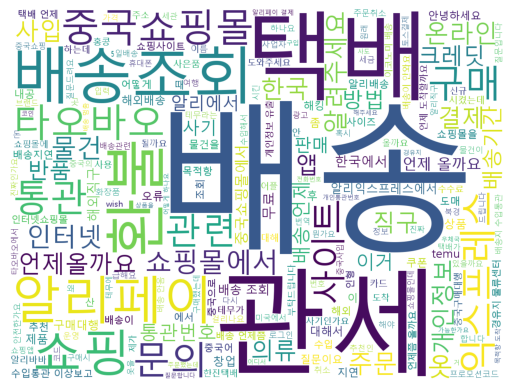

In [186]:
# matplotlib 에서 보여주기
plt.figure(figure=(10,8))
plt.axis('off')
plt.imshow(wc1)
plt.show()